Incluimos las librerias necesarias para el proyecto de la pokedex

In [ ]:
# import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import imutils
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Generamos una funcion que realice el modelo que necesitamos para la pokedex

In [ ]:
def deep_CNN(width, height, depth, classes, batchNorm):
  
  # Definimos entradas en modo "channels last"
  inputs = Input(shape=(height, width, depth)) #(X)
    
  # Definimos la arquitectura
  # Primer set de capas CONV => RELU => CONV => RELU => POOL
  x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) #(X)
  if batchNorm: 
    x1 = BatchNormalization()(x1) #(X)
  x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) #(X)
  if batchNorm:
    x1 = BatchNormalization()(x1) #(X)
  x1 = MaxPooling2D(pool_size=(2, 2))(x1) #(X)
  x1 = Dropout(0.25)(x1) #(X)
  
  # Segundo set de capas CONV => RELU => CONV => RELU => POOL
  x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) #(X)
  if batchNorm: #(X)
    x2 = BatchNormalization()(x2) #(X)
  x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) #(X)
  if batchNorm:
    x2 = BatchNormalization()(x2) #(X)
  x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)
  x2 = Dropout(0.25)(x2) #(X)
  
  # Primer (y único) set de capas FC => RELU
  xfc = Flatten()(x2) #(X)
  xfc = Dense(512, activation="relu")(xfc) #(X)
  if batchNorm:
    xfc = BatchNormalization()(xfc) #(X)
  xfc = Dropout(0.5)(xfc) #(X)
  # Clasificador softmax
  predictions = Dense(classes, activation="softmax")(xfc) #(X)
  
  # Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
  model = Model(inputs=inputs, outputs=predictions) #(X)
  
  # La función debe devolver el modelo como salida           
  return model

Conectamos con GoogleDrive donde almacenamos las imagenes. Sera necesario registrarse

In [ ]:
drive.mount('/content/drive') #(X)
dataset_path = "/content/drive/MyDrive/DeepLearning/microproyectos/proyecto1/Nivel_Basico_Desarrollo_Pokedex/dataset"
examples_path = "/content/drive/MyDrive/DeepLearning/microproyectos/proyecto1/Nivel_Basico_Desarrollo_Pokedex/examples/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Realizamos la compilacion del modelo

In [ ]:
# this is the augmentation configuration we will use for training
datagen_train = ImageDataGenerator( 
    rotation_range=int(180*0.1),  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0.1,  
    horizontal_flip=True,
    validation_split=0.2,
    rescale=1./255
    )

train_data_dir = dataset_path
train_datagen = datagen_train.flow_from_directory(train_data_dir, batch_size=128, target_size=(256,256), class_mode = 'categorical', subset='training') #(X)
val_datagen = datagen_train.flow_from_directory(train_data_dir, batch_size=128, target_size=(256,256) , class_mode = 'categorical', subset='validation') #(X)


Found 937 images belonging to 5 classes.
Found 230 images belonging to 5 classes.


Compilamos el modelo 

In [ ]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# Instanciamos el modelo ajustado al dataset CIFAR10
model = deep_CNN(256,256,3,5,True)
# Compilamos el modelo sacando como mérica el accuracy
model.compile(optimizer=SGD(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

[INFO]: Compilando el modelo...


Entrenamos el modelo y lo guardamos para no tener que realizar esto nunca mas. El modelo quedara guardado en la ruta del proyecto

In [ ]:
n_epochs = 60
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model.fit(train_datagen, epochs=n_epochs, batch_size=128, validation_data=val_datagen)


# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive') #(X)
# Almacenamos el modelo empleando la función mdoel.save de Keras
model.save("/content/drive/MyDrive/DeepLearning/microproyectos/proyecto1/Nivel_Basico_Desarrollo_Pokedex/Pokedex.h5") #(X)


[INFO]: Entrenando la red...
Epoch 1/60
4/8 [==============>...............] - ETA: 18s - loss: 2.3775 - accuracy: 0.2790

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


8/8 [==============================] - 48s 6s/step - loss: 2.0465 - accuracy: 0.3680 - val_loss: 1.5843 - val_accuracy: 0.2261
Epoch 2/60
8/8 [==============================] - 42s 5s/step - loss: 0.8904 - accuracy: 0.7047 - val_loss: 1.5946 - val_accuracy: 0.2217
Epoch 3/60
8/8 [==============================] - 42s 5s/step - loss: 0.9034 - accuracy: 0.6849 - val_loss: 1.6318 - val_accuracy: 0.2043
Epoch 4/60
8/8 [==============================] - 42s 5s/step - loss: 0.8061 - accuracy: 0.7358 - val_loss: 1.6386 - val_accuracy: 0.2043
Epoch 5/60
8/8 [==============================] - 42s 5s/step - loss: 0.7930 - accuracy: 0.7482 - val_loss: 1.6662 - val_accuracy: 0.2043
Epoch 6/60
8/8 [==============================] - 42s 5s/step - loss: 0.6429 - accuracy: 0.7837 - val_loss: 1.6411 - val_accuracy: 0.2043
Epoch 7/60
8/8 [==============================] - 42s 5s/step - loss: 0.5735 - accuracy: 0.8032 - val_loss: 1.5995 - val_accuracy: 0.2043
Epoch 8/60
8/8 [=============================

Generamos las graficas para comprobar el modelo

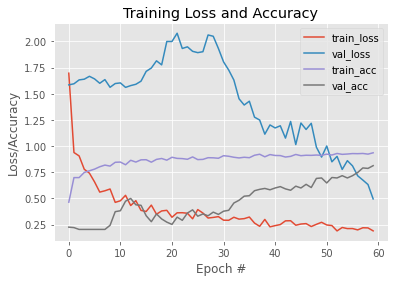

In [ ]:


# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Generamos una funcion que genera la prediccion de las imagenes

In [ ]:
def predict_image(image, model, gt_str="CIFAR10"):
  # Creamos una copia sobre la que mostraremos el resultado (comando image.copy())
  output = image.copy() #(X)
  
  image = img_to_array(image)
  # Expandimos las dimensiones (32, 32, 3) a (1, 32, 32, 3)
  image = np.expand_dims(image, axis=0) #(X)

  # Clasificación de la imagen empleando el modelo
  print("[INFO]: Clasificando imagen...")
  # Realizamos la predicción
  proba = model.predict(image) #(X)
  print(proba)
  # Nos quedamos con la clase que presente una probabilidad mayor y buscamos la etiqueta en el vector labelNames
  idx = np.argmax(proba) #(X)
  labelNames=["bulbasaur","charmander","mewtwo","pikachu","squirtle",]
  label = labelNames[idx] #(X)
  # gt = labelNames[testY[num_img][0]] #(X)
  # # En caso que en la variable gt_str no me pasen el string "CIFAR10" es que me estan pasando el string con la etiqueta
  # # Si ese es el caso almaceno el gt de ese String (esto nos valdrá para predecir imágenes que no sean del dataset CIFAR10)
  # if gt_str != "CIFAR10":
  #   gt = gt_str #(X)

  # Mostrando imagen e información
  label = "Predicción: {} - Confianza: {:.2f}%".format(label, proba[0][idx] * 100)
  plt.imshow(output)
  plt.title(label)
  plt.show()
  




Comprobamos con alguna imagen el modelo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO]: Clasificando imagen...
[[0. 0. 0. 1. 0.]]


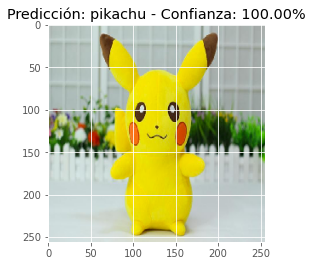

In [ ]:
drive.mount('/content/drive') #(X)

input_shape=(256,256,3)
# Cargamos la imagen, nos aseguramos de que el tamaño es el adecuado y almacenamos en array
image_source = [examples_path + "/bulbasaur_plush.png" ,
                examples_path + "/charmander_counter.png",
                examples_path + "/charmander_hidden.png",
                examples_path + "/mewtwo_toy.png",
                examples_path + "/pikachu_toy.png",
                examples_path + "/squirtle_plush.png",
                examples_path + "/00000000.png"]

image = load_img(image_source[4], target_size=input_shape)
image = np.resize(image, (input_shape[0], input_shape[1], 3))

model = load_model("/content/drive/MyDrive/DeepLearning/microproyectos/proyecto1/Nivel_Basico_Desarrollo_Pokedex/Pokedex.h5") #(X)
 
predict_image(image, model) #(X)